In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [69]:
## 1-(a)
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/X.dat', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/Y.dat', header = None)

test_data = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/Xtest.dat', sep = "\s+", header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/satimage/Ytest.dat', header = None)

In [70]:
params = [10, 30, 100, 300]
train_mis = []
test_mis = []
total_time = []
for k in params :
  start = time.time()
  clf = RandomForestClassifier(n_estimators = k)
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(test_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, test_label))
  stop = time.time()
  total_time.append(stop - start)

ind = np.argmin(test_mis)
best = np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])
best_par = ['k = ' + str(params[ind])]

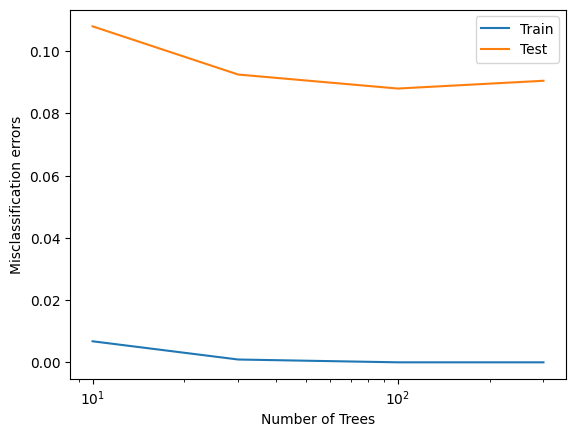

In [71]:
plt.semilogx(params, train_mis)
plt.semilogx(params, test_mis)
plt.xlabel('Number of Trees')
plt.ylabel('Misclassification errors')
plt.legend(['Train', 'Test'])
plt.show()

In [72]:
## 1-(b)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

params = [10, 30, 100, 300]
train_mis = []
test_mis = []
total_time = []
for k in params :
  start = time.time()
  clf = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 2), n_estimators = k)
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(test_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, test_label))
  stop = time.time()
  total_time.append(stop - start)

ind = np.argmin(test_mis)
best = np.concatenate((best, np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])), axis = 0)
best_par.append('k = ' + str(params[ind]))

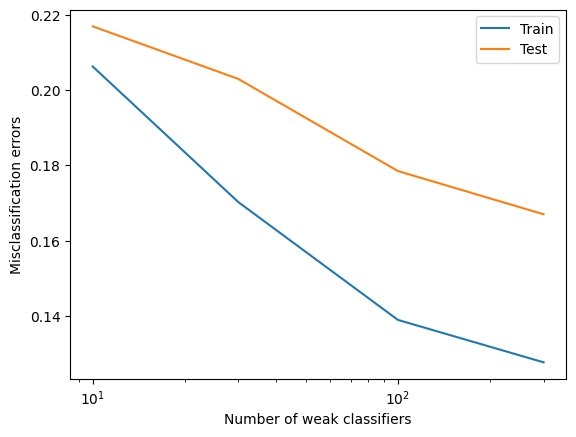

In [73]:
plt.semilogx(params, train_mis)
plt.semilogx(params, test_mis)
plt.xlabel('Number of weak classifiers')
plt.ylabel('Misclassification errors')
plt.legend(['Train', 'Test'])
plt.show()

In [74]:
## 1-(c)
from sklearn.ensemble import GradientBoostingClassifier

params = [10, 30, 100, 300]
train_mis = []
test_mis = []
total_time = []
for k in params :
  start = time.time()
  clf = GradientBoostingClassifier(n_estimators = k)
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(test_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, test_label))
  stop = time.time()
  total_time.append(stop - start)

ind = np.argmin(test_mis)
best = np.concatenate((best, np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])), axis = 0)
best_par.append('k = ' + str(params[ind]))

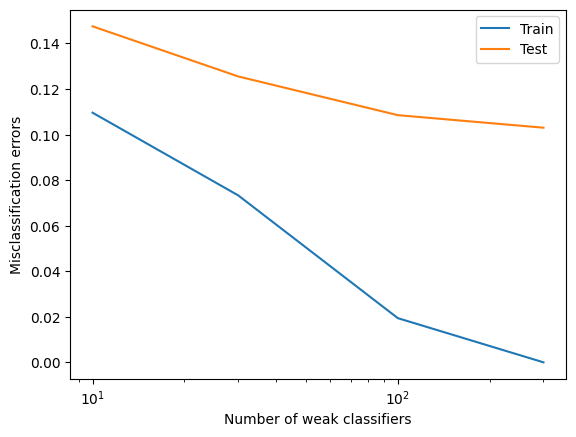

In [75]:
plt.semilogx(params, train_mis)
plt.semilogx(params, test_mis)
plt.xlabel('Number of weak classifiers')
plt.ylabel('Misclassification errors')
plt.legend(['Train', 'Test'])
plt.show()

In [86]:
## 1-(d)
from sklearn import preprocessing
from sklearn.svm import SVC

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

reg = [0.1, 1, 10]
deg = np.arange(1, 16)
train_mis = np.zeros((len(deg), len(reg)))
test_mis = np.zeros((len(deg), len(reg)))
total_time = np.zeros((len(deg), len(reg)))
for i, Cval in enumerate(reg):
  for j, d in enumerate(deg) :
    start = time.time()
    clf = SVC(C = Cval, kernel = 'poly', degree = d)
    clf = clf.fit(train_data, train_label.values.ravel())
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    train_mis[j, i] = 1 - accuracy_score(train_pred, train_label)
    test_mis[j, i] = 1 - accuracy_score(test_pred, test_label)
    stop = time.time()
    total_time[j, i] = stop - start

ind = np.unravel_index(test_mis.argmin(), test_mis.shape)
best = np.concatenate((best, np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])), axis = 0)
best_par.append(['C = ' + str(reg[ind[1]]), 'd = ' + str(deg[ind[0]])])

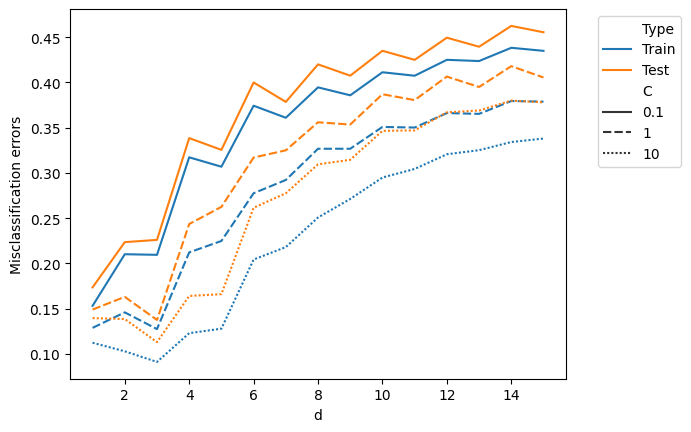

In [87]:
import seaborn as sns

data = {'d': np.tile(np.arange(1, 16), 6),
        'Misclassification errors': np.concatenate((np.transpose(train_mis).reshape(-1, 1).ravel(), np.transpose(test_mis).reshape(-1, 1).ravel())),
        'Type': ['Train']*45 + ['Test']*45,
        'C': ['0.1']*15 + ['1']*15 + ['10']*15 + ['0.1']*15 + ['1']*15 + ['10']*15}

p = sns.lineplot(data=data, x='d', y='Misclassification errors', hue='Type', style='C')
p.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [88]:
## 1-(e)
reg = [0.1, 1, 10]
pow = np.arange(5, 20)
train_mis = np.zeros((len(pow), len(reg)))
test_mis = np.zeros((len(pow), len(reg)))
total_time = np.zeros((len(pow), len(reg)))
for i, Cval in enumerate(reg):
  for j, d in enumerate(pow) :
    start = time.time()
    clf = SVC(C = Cval, kernel = 'rbf', gamma = (1/2)**(d))
    clf = clf.fit(train_data, train_label.values.ravel())
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    train_mis[j, i] = 1 - accuracy_score(train_pred, train_label)
    test_mis[j, i] = 1 - accuracy_score(test_pred, test_label)
    stop = time.time()
    total_time[j, i] = stop - start

ind = np.unravel_index(test_mis.argmin(), test_mis.shape)
best = np.concatenate((best, np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])), axis = 0)
best_par.append(['C = ' + str(reg[ind[1]]), 'i = ' + str(deg[ind[0]])])

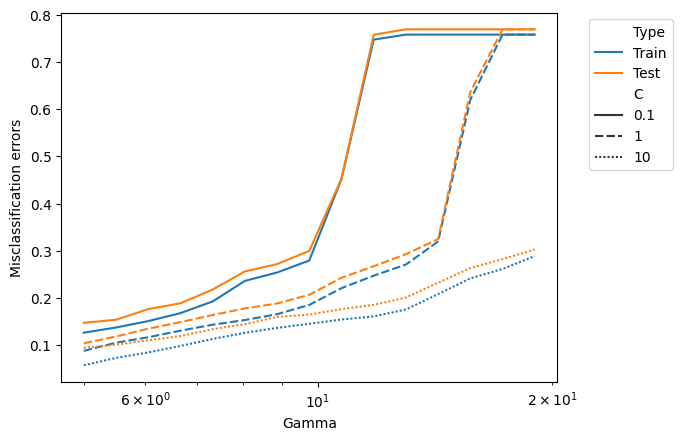

In [89]:
data = {'Gamma': np.tile(np.logspace(np.log10(5), np.log10(19), 15), 6),
        'Misclassification errors': np.concatenate((np.transpose(train_mis).reshape(-1, 1).ravel(), np.transpose(test_mis).reshape(-1, 1).ravel())),
        'Type': ['Train']*45 + ['Test']*45,
        'C': ['0.1']*15 + ['1']*15 + ['10']*15 + ['0.1']*15 + ['1']*15 + ['10']*15}

p = sns.lineplot(data=data, x='Gamma', y='Misclassification errors', hue='Type', style='C')
plt.xscale('log')
p.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [98]:
print(pd.DataFrame({'Model Name' : ['Random Forest', 'Adaboost', 'GradientBoost', 'SVM with polynomial kernel', 'SVM with RBF kernel'], 'Training error' : best[:,0], 'Test error' : best[:,1], 'Total training time' : best[:,2], 'Parameter combination' : best_par}))

                   Model Name  Training error  Test error  \
0               Random Forest        0.000000       0.088   
1                    Adaboost        0.127621       0.167   
2               GradientBoost        0.000000       0.103   
3  SVM with polynomial kernel        0.091094       0.113   
4         SVM with RBF kernel        0.056821       0.094   

   Total training time Parameter combination  
0             7.515520               k = 100  
1             9.244122               k = 300  
2            67.413861               k = 300  
3            75.416376       [C = 10, d = 3]  
4           121.069214       [C = 10, i = 1]  


In [99]:
## 1-(f)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/hill-valley/X.dat', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/hill-valley/Y.dat', header = None)

test_data = pd.read_csv('/content/gdrive/MyDrive/Data/hill-valley/Xtest.dat', sep = "\s+", header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/hill-valley/Ytest.dat', header = None)

In [100]:
params = [10, 30, 100, 300]
train_mis = []
test_mis = []
total_time = []
for k in params :
  start = time.time()
  clf = GradientBoostingClassifier(n_estimators = k)
  clf = clf.fit(train_data, train_label.values.ravel())
  train_pred = clf.predict(train_data)
  test_pred = clf.predict(test_data)
  train_mis.append(1 - accuracy_score(train_pred, train_label))
  test_mis.append(1 - accuracy_score(test_pred, test_label))
  stop = time.time()
  total_time.append(stop - start)

ind = np.argmin(test_mis)
best = np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])
best_par = ['k = ' + str(params[ind])]

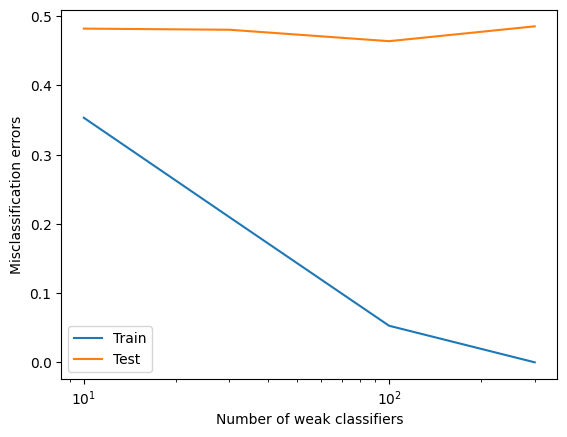

In [101]:
plt.semilogx(params, train_mis)
plt.semilogx(params, test_mis)
plt.xlabel('Number of weak classifiers')
plt.ylabel('Misclassification errors')
plt.legend(['Train', 'Test'])
plt.show()

In [102]:
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

reg = [0.1, 1, 10]
deg = np.arange(1, 16)
train_mis = np.zeros((len(deg), len(reg)))
test_mis = np.zeros((len(deg), len(reg)))
total_time = np.zeros((len(deg), len(reg)))
for i, Cval in enumerate(reg):
  for j, d in enumerate(deg) :
    start = time.time()
    clf = SVC(C = Cval, kernel = 'poly', degree = d)
    clf = clf.fit(train_data, train_label.values.ravel())
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    train_mis[j, i] = 1 - accuracy_score(train_pred, train_label)
    test_mis[j, i] = 1 - accuracy_score(test_pred, test_label)
    stop = time.time()
    total_time[j, i] = stop - start

ind = np.unravel_index(test_mis.argmin(), test_mis.shape)
best = np.concatenate((best, np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])), axis = 0)
best_par.append(['C = ' + str(reg[ind[1]]), 'd = ' + str(deg[ind[0]])])

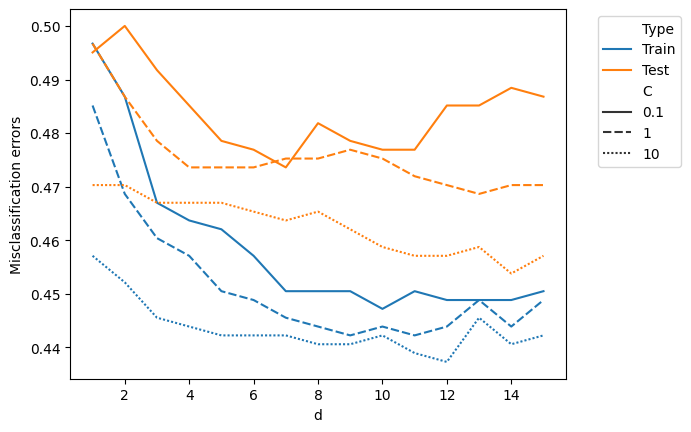

In [103]:
data = {'d': np.tile(np.arange(1, 16), 6),
        'Misclassification errors': np.concatenate((np.transpose(train_mis).reshape(-1, 1).ravel(), np.transpose(test_mis).reshape(-1, 1).ravel())),
        'Type': ['Train']*45 + ['Test']*45,
        'C': ['0.1']*15 + ['1']*15 + ['10']*15 + ['0.1']*15 + ['1']*15 + ['10']*15}

p = sns.lineplot(data=data, x='d', y='Misclassification errors', hue='Type', style='C')
p.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [104]:
reg = [0.1, 1, 10]
pow = np.arange(5, 20)
train_mis = np.zeros((len(pow), len(reg)))
test_mis = np.zeros((len(pow), len(reg)))
total_time = np.zeros((len(pow), len(reg)))
for i, Cval in enumerate(reg):
  for j, d in enumerate(pow) :
    start = time.time()
    clf = SVC(C = Cval, kernel = 'rbf', gamma = (1/2)**(d))
    clf = clf.fit(train_data, train_label.values.ravel())
    train_pred = clf.predict(train_data)
    test_pred = clf.predict(test_data)
    train_mis[j, i] = 1 - accuracy_score(train_pred, train_label)
    test_mis[j, i] = 1 - accuracy_score(test_pred, test_label)
    stop = time.time()
    total_time[j, i] = stop - start

ind = np.unravel_index(test_mis.argmin(), test_mis.shape)
best = np.concatenate((best, np.array([[train_mis[ind], test_mis[ind], np.sum(total_time)]])), axis = 0)
best_par.append(['C = ' + str(reg[ind[1]]), 'i = ' + str(deg[ind[0]])])

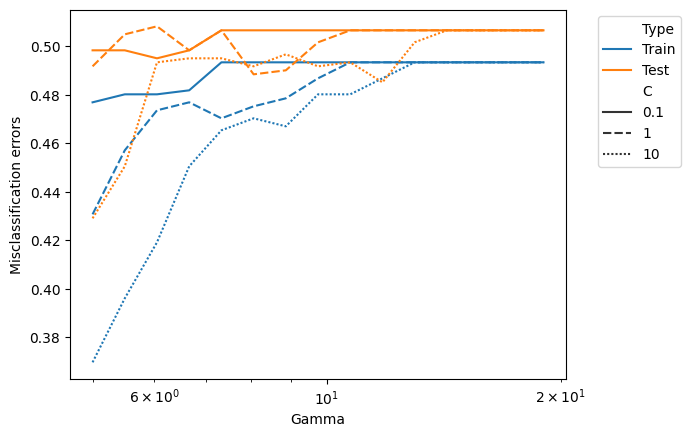

In [105]:
data = {'Gamma': np.tile(np.logspace(np.log10(5), np.log10(19), 15), 6),
        'Misclassification errors': np.concatenate((np.transpose(train_mis).reshape(-1, 1).ravel(), np.transpose(test_mis).reshape(-1, 1).ravel())),
        'Type': ['Train']*45 + ['Test']*45,
        'C': ['0.1']*15 + ['1']*15 + ['10']*15 + ['0.1']*15 + ['1']*15 + ['10']*15}

p = sns.lineplot(data=data, x='Gamma', y='Misclassification errors', hue='Type', style='C')
plt.xscale('log')
p.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [106]:
print(pd.DataFrame({'Model Name' : ['GradientBoost', 'SVM with polynomial kernel', 'SVM with RBF kernel'], 'Training error' : best[:,0], 'Test error' : best[:,1], 'Total training time' : best[:,2], 'Parameter combination' : best_par}))

                   Model Name  Training error  Test error  \
0               GradientBoost        0.052805    0.463696   
1  SVM with polynomial kernel        0.440594    0.453795   
2         SVM with RBF kernel        0.369637    0.429043   

   Total training time Parameter combination  
0            12.547704               k = 100  
1            12.514931      [C = 10, d = 14]  
2            12.527346       [C = 10, i = 1]  
